# DSCI 235 Final Assignment


Data Source: https://covidtracking.com/data and https://data.ers.usda.gov/reports.aspx?ID=17827

## Project Description

As we know covid has had a big impact on the world in the past couple of years. I have found a dataset that contains a lot of information about how covid has impacted the different states in the US. This dataset contains data from January 13, 2020 to March 7, 2021. With this dataset I want to get a better understanding of how covid many have impacted people differently in the different states. During the times where covid cases were at its peak this information would have been very helpful. Although Covid is not a big threat as it was during that time, analyzing this dataset will help us understand some of the trends and the impact it had on everyone. The questions I intend to answer are: 
1. Is the data similar for hospitalization rate, death rate and positive cases in each state?
2. How much has the vaccine impacted the amount of people getting covid? 
3. What is the rate of people getting hospitalized after testing positive?
4. How many people has covid affected in each state and is there a trend in each state?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%autosave 60 

Autosaving every 60 seconds


data is the raw COVID data. pop is the population in each state.

In [2]:
# raw data
data = pd.read_csv('all-states-history.csv')
data.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


## Part 1: How does the data differ between the states?

This section focuses on:
- Death rate
- Hospitalization 
- Positive cases vs total test results vs recovery rate

In [3]:
df = data.set_index(['state', 'date'])
df.head()


,,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
state,date,,,,,,,,,,,,,,,,,,,,,
AK,2021-03-07,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,NaN,NaN,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
AL,2021-03-07,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,2676.0,NaN,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
AR,2021-03-07,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,NaN,141.0,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
AS,2021-03-07,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
AZ,2021-03-07,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,NaN,273.0,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


In [4]:
highest = df['death'].idxmax()
highestCO = df['death'].loc['CO'].idxmax()
print('California in 2021-03-07 had the highest death.', highest)
print('Colorado highest death rate was on', highestCO)

California in 2021-03-07 had the highest death. ('CA', '2021-03-07')
Colorado highest death rate was on 2021-03-07


In [5]:
print('The average number of people hospitalized over this time period in each state:')
avg = df.groupby('state')[['hospitalized']].mean()
avg

The average number of people hospitalized over this time period in each state:


,hospitalized
state,
AK,433.038462
AL,18146.878698
AR,5917.469208
AS,NaN
AZ,20124.138211
CA,NaN
CO,9771.741573
CT,10905.365714
DC,NaN


## Part 2: What is the rate of people getting hospitalized after testing positive?


In [6]:
cases = df[['positive','totalTestResults', 'recovered']].dropna()
cases['recovery rate'] = cases['recovered']/cases['positive']*100
cases

,,positive,totalTestResults,recovered,recovery rate
state,date,,,,
AL,2021-03-07,499819.0,2323788.0,295690.0,59.159416
AR,2021-03-07,324818.0,2736442.0,315517.0,97.136550
DC,2021-03-07,41419.0,1261363.0,29570.0,71.392356
GU,2021-03-07,7749.0,120636.0,7590.0,97.948122
IA,2021-03-07,282384.0,1326802.0,320054.0,113.339991
...,...,...,...,...,...
WY,2020-03-26,53.0,1977.0,12.0,22.641509
AR,2020-03-25,280.0,1717.0,11.0,3.928571
ME,2020-03-25,149.0,3963.0,7.0,4.697987


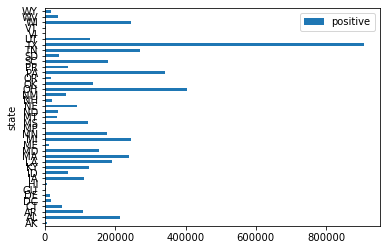

In [7]:
recrate = cases.reset_index()
p = cases.groupby('state')[['positive']].mean()
pos = p.plot.barh()


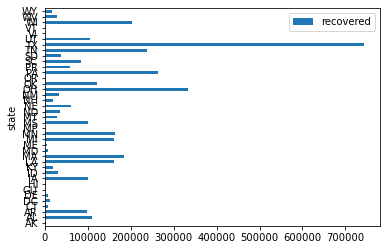

In [8]:
r = cases.groupby('state')[['recovered']].mean()
rec = r.plot.barh()

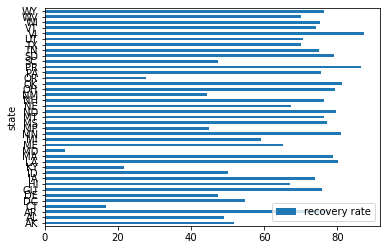

In [9]:
rr = cases.groupby('state')[['recovery rate']].mean()
recr = rr.plot.barh()

From these tables we can see that the data is very similar comaparing all the differnt states except for a couple outliears in the people that tested positive and the recoved group. 

## Part 3: How much has the vaccine impacted the amount of people getting COVID?

In [10]:
pop = pd.read_csv('USPopulationReport.csv')
abbrevs = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv')
pop.head()
abbrevs.head() 

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [11]:
cases2020 = cases.reset_index()
cases2020['date'] = pd.DatetimeIndex(cases2020['date'])
cases2020 = cases2020[cases2020.date < '2021-01-01']
cases2020

,state,date,positive,totalTestResults,recovered,recovery rate
2244,AL,2020-12-31,361226.0,1874000.0,202137.0,55.958597
2245,AR,2020-12-31,225138.0,2051488.0,199247.0,88.499942
2246,DC,2020-12-31,28983.0,897439.0,20770.0,71.662699
2247,GU,2020-12-31,7317.0,96192.0,7047.0,96.309963
2248,IA,2020-12-31,239173.0,1171219.0,238982.0,99.920141
...,...,...,...,...,...,...
11998,WY,2020-03-26,53.0,1977.0,12.0,22.641509
11999,AR,2020-03-25,280.0,1717.0,11.0,3.928571
12000,ME,2020-03-25,149.0,3963.0,7.0,4.697987
12001,MN,2020-03-25,502.0,11690.0,121.0,24.103586


In [12]:
cases2020 = cases2020.set_index('state')
pop2020 = pop[['Name','Pop. 2020']]


In [13]:
merged = pd.merge(cases2020, abbrevs, how = 'outer', left_on = 'state', right_on = 'abbreviation')
merged = merged.drop('abbreviation', axis = 1)
merged

population = pd.merge(pop2020, merged, how = 'outer', left_on = 'Name', right_on = 'state')
population = population.drop('Name', axis = 1).dropna()
population



,Pop. 2020,date,positive,totalTestResults,recovered,recovery rate,state
1,"5,024,279",2020-12-31,361226.0,1874000.0,202137.0,55.958597,Alabama
2,"5,024,279",2020-12-30,356820.0,1862248.0,202137.0,56.649571,Alabama
3,"5,024,279",2020-12-29,351804.0,1855192.0,193149.0,54.902446,Alabama
4,"5,024,279",2020-12-28,347897.0,1848117.0,193149.0,55.519019,Alabama
5,"5,024,279",2020-12-27,345628.0,1843740.0,193149.0,55.883493,Alabama
...,...,...,...,...,...,...,...
8872,"576,851",2020-03-29,86.0,2384.0,20.0,23.255814,Wyoming
8873,"576,851",2020-03-28,82.0,2306.0,18.0,21.951220,Wyoming
8874,"576,851",2020-03-27,70.0,2204.0,17.0,24.285714,Wyoming
8875,"576,851",2020-03-26,53.0,1977.0,12.0,22.641509,Wyoming


The new row, recovery rate, gives us the percent of people that recover after testing positive. This number seems a lot lower than expected, but we can see that there is a difference between states. Some possible reasons for this could be that the hospital treatment was not as good compared to the other states.

## Part 4: How many people has covid affected in each state and is there a trend in each state?

Data by month in 2020

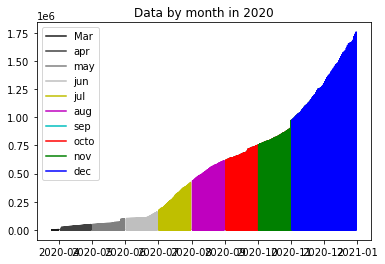

In [14]:
mar = cases2020[cases2020.date < '2020-04-01']
apr = cases2020[(cases2020.date > '2020-04-01') & (cases2020.date < '2020-05-01')]
may = cases2020[(cases2020.date > '2020-05-01') & (cases2020.date < '2020-06-01')]
jun = cases2020[(cases2020.date > '2020-06-01') & (cases2020.date < '2020-07-01')]
jul = cases2020[(cases2020.date > '2020-07-01') & (cases2020.date < '2020-08-01')]
aug = cases2020[(cases2020.date > '2020-08-01') & (cases2020.date < '2020-09-01')]
sep = cases2020[(cases2020.date > '2020-09-01') & (cases2020.date < '2020-10-01')]
octo = cases2020[(cases2020.date > '2020-09-01') & (cases2020.date < '2020-11-01')]
nov = cases2020[(cases2020.date > '2020-10-01') & (cases2020.date < '2020-12-01')]
dec = cases2020[(cases2020.date > '2020-11-01') & (cases2020.date < '2021-01-01')]

plt.plot(mar['date'], mar['positive'], label = 'Mar', color = '0.1')
plt.plot(apr['date'], apr['positive'], label = 'apr', color = '0.25')
plt.plot(may['date'], may['positive'], label = 'may', color = '0.50')
plt.plot(jun['date'], jun['positive'], label = 'jun', color = '0.75')
plt.plot(jul['date'], jul['positive'], label = 'jul', color = 'y')
plt.plot(aug['date'], aug['positive'], label = 'aug', color = 'm')
plt.plot(sep['date'], sep['positive'], label = 'sep', color = 'c')
plt.plot(octo['date'], octo['positive'], label = 'octo', color = 'r')
plt.plot(nov['date'], nov['positive'], label = 'nov', color = 'g')
plt.plot(dec['date'], dec['positive'], label = 'dec', color = 'b')

plt.title('Data by month in 2020')
plt.legend()
plt.show()


This plot shows how the positive cases for COVID drematically increased in towards the end of 2020. There looks like there is an exponential increase. 

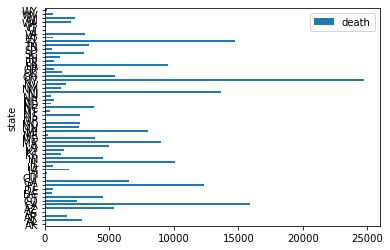

In [15]:
avgd = df.groupby('state')[['death']].mean()
d = avgd.plot.barh()


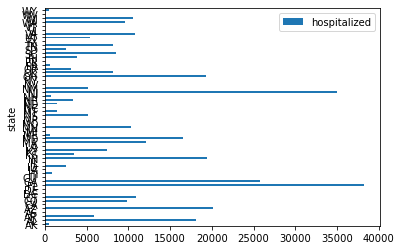

In [16]:
avgh = df.groupby('state')[['hospitalized']].mean()
h = avgh.plot.barh()

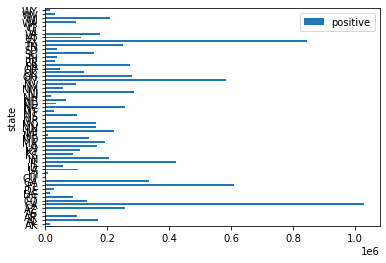

In [17]:
avgp  = df.groupby('state')[['positive']].mean()
p = avgp.plot.barh()

There seems to be a trend in each country. The number of deaths and positive cases as well as the number of hospitalized seem like they are correlated. 

### Conclusion

After working with this data set, we can see that the data supports the claim that we had. COVID-19 increased a lot from the beginning of 2020 to 2021. It showed us that the number of people testing positive was increasing exponentially, but it also showed us how many of the people were also recovering. One thing I would like to change in the future is to work with a data set that doesn't have a lot of nans in it. Another thing I would have changed is looking at a data set that collected data up until 2022. This would have really allowed us to look at the impact of the vaccine.
